<a href="https://colab.research.google.com/github/shevtsovasofi/machine_learning/blob/main/machine_learning_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ПЛАН
Домашнее задание

1) Загрузите датасет для бинарной или многоклассовой классификации:
Пример: обзоры фильмов с разметкой тональности в формате *.csv - я взяла IMDB

2) Выполните препроцессинг:
- Чистка данных методами NLP (регулярки, удаление стоп-слов и т.д.) и Data Science (удаление пустых строк с помощью pd.dropna())

- Токенизация + векторизация (преобразование текстов к виду числовых представлений), например, с помощью токенизатора TensorFlow/Keras или PyTorch
- Паддинг/усечение (транкейшн) текстовых последовательностей
- Разделение датасета на обучающую, проверочную и тестовую выборки


3) Постройте модель CNN:
- Добавьте входной слой
- Добавьте слои свертки и пулинга
- Настройте размер ядра свертки
- Добавьте полносвязные слои
- Настройте функции активации для промежуточных и выходных слоев

4) Скомпилируйте модель:
- Настройте функцию потерь, оптимизатор укажите метрики оценки для валидации модели в процессе обучения

5) Обучите модель:
- Введите данные в модель
- Добавьте отслеживание потерь/точности обучения

6) Оцените модель:
- Проверьте модель на тестовом наборе
- Вычислите метрики оценки (например, полноту, точность, F1-меру)
- Выполните визуализацию результатов (например, с помощью матрицы ошибок)

7) Произведите настройку параметров
- Добавьте комментарии: какие настройки вы изменили и почему? Обоснуйте выбор параметров.

8) Сохраните модель
https://www.tensorflow.org/tutorials/keras/save_and_load

9) Базовый уровень:
- Загрузите результат на гитхаб


In [5]:
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [42]:
data = pd.read_csv("IMDB Dataset.csv", engine='python', on_bad_lines='skip', encoding='utf-8')
#в датасете с кэгл были проблемные строчки, поэтому привлекла парсер + пропускаем строки, на которые ругается колаб
data.head()

data.dropna(subset=['review'], inplace=True) #если review = NaN, удаляем строку

In [8]:
with open('stopwords_english', 'r', encoding='utf-8') as f:
  stopwords = f.read()

- убираем стопслова, чистим регулярками (пустые строки убрали выше)

In [10]:
def clean(text, stopwords=stopwords):
  text = text.lower()
  text = re.sub(r'[^a-z\s]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()
  text = [word for word in text.split() if word not in stopwords]

  return ' '.join(text)


data['review'] = data['review'].apply(clean)
data['review'].head()

,review
0,one reviewers mentioned watching oz episode yo...
1,wonderful little production br br filming tech...
2,thought wonderful way spend time hot summer we...
3,basically theres family little boy jake thinks...
4,petter matteis love time money visually stunni...


- токенизируем и векторизуем + делаем паддинг

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data['review'])
sequences = tokenizer.texts_to_sequences(data['review'])
X = pad_sequences(sequences, maxlen=200)
y = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0) # преобразовываем метки


- делим на обучающую, проверочную и тестовую выборки

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

**СТРОИМ МОДЕЛЬ CNN**

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

model = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=128), #этот слой преобразует слова в векторы
    layers.Conv1D(filters=128, kernel_size=5, activation='relu'), #этот слой достает докальные признаки из текста
    layers.GlobalMaxPooling1D(), #этот слой сохраняет важные признаки, но уменьшает размер
    layers.Dense(64, activation='relu'), #этой слой объединяет п-ки
    layers.Dropout(0.5), #этот слой следит за переобучением
    layers.Dense(1, activation='sigmoid') #этот слой возвращает вероятность принадлежности к классу
])

- компилируем модель

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**ОБУЧАЕМ!!!**

In [16]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
491/491 ━━━━━━━━━━━━━━━━━━━━ 93s 185ms/step - accuracy: 0.7034 - loss: 0.5396 - val_accuracy: 0.8727 - val_loss: 0.3019
Epoch 2/5
491/491 ━━━━━━━━━━━━━━━━━━━━ 138s 178ms/step - accuracy: 0.9243 - loss: 0.2068 - val_accuracy: 0.8800 - val_loss: 0.3028
Epoch 3/5
491/491 ━━━━━━━━━━━━━━━━━━━━ 142s 179ms/step - accuracy: 0.9783 - loss: 0.0789 - val_accuracy: 0.8854 - val_loss: 0.3273
Epoch 4/5
491/491 ━━━━━━━━━━━━━━━━━━━━ 146s 187ms/step - accuracy: 0.9956 - loss: 0.0224 - val_accuracy: 0.8783 - val_loss: 0.4593
Epoch 5/5
491/491 ━━━━━━━━━━━━━━━━━━━━ 137s 177ms/step - accuracy: 0.9992 - loss: 0.0060 - val_accuracy: 0.8797 - val_loss: 0.5571


In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

307/307 - 7s - 21ms/step - accuracy: 0.8812 - loss: 0.5424
Test accuracy: 0.8812


- вычисляем метрики оценки

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Classification Report:") # вычисляем метки
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

print("Confusion Matrix:") # матрица ошибок
print(confusion_matrix(y_test, y_pred))

307/307 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.87      0.88      4861
    Positive       0.88      0.89      0.88      4956

    accuracy                           0.88      9817
   macro avg       0.88      0.88      0.88      9817
weighted avg       0.88      0.88      0.88      9817

Confusion Matrix:
[[4247  614]
 [ 547 4409]]


*выглядит уже хорошо...*

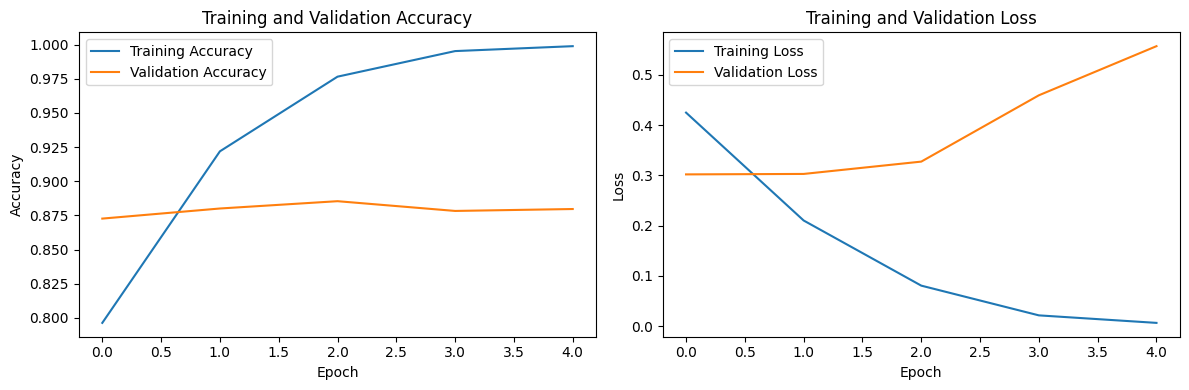

In [18]:
# Отрисовка графика прогресса обучения
plt.figure(figsize=(12, 4))

# Отрисовка аккуратности (точности) модели
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Отрисовка значений функции потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

ПОМЕНЯЕМ ПАРАМЕТРЫ

увеличение батчей и количества эпох не привело ни к чему хорошему - модель с 0.88 скатилась до 0.85, поэтому я решила сделать более глубокие изменения: увеличила дропаут с 0.5 до 0.6, в dense добавила L2-регуляризацию (появился штраф за переобучение), при компиляции в адаме добавила learning rate, чтобы обучение было более стабильным

In [31]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

# Построение улучшенной модели
improved_model = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=128),
    layers.Conv1D(filters=128, kernel_size=5, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.6),
    layers.Dense(1, activation='sigmoid')
])

improved_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [36]:
from tensorflow.keras.callbacks import EarlyStopping

# gpt мне несколько раз очень настоятельно предлагала как одно из улучшений ввести раннюю остановку - я решила попробовать...
early_stopping = EarlyStopping(
    monitor='val_loss',  # отслеживаем потери на валидационной выборке
    patience=3,          # количество эпох без улучшения перед остановкой
    restore_best_weights=True  # восстановить веса лучшей модели
)

history = improved_model.fit(
    X_train, y_train,
    epochs=20,  # теперь максимально 20 эпох, но надеюсь, что остановится быстрее
    batch_size=128,  # увеличен размер батча
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 89s 350ms/step - accuracy: 0.5130 - loss: 1.4693 - val_accuracy: 0.7344 - val_loss: 1.2531
Epoch 2/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 139s 339ms/step - accuracy: 0.6572 - loss: 1.1866 - val_accuracy: 0.7125 - val_loss: 0.9820
Epoch 3/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 83s 340ms/step - accuracy: 0.7394 - loss: 0.9224 - val_accuracy: 0.7938 - val_loss: 0.7443
Epoch 4/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 83s 338ms/step - accuracy: 0.7928 - loss: 0.7115 - val_accuracy: 0.8295 - val_loss: 0.5862
Epoch 5/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 143s 342ms/step - accuracy: 0.8379 - loss: 0.5652 - val_accuracy: 0.8471 - val_loss: 0.4912
Epoch 6/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 142s 343ms/step - accuracy: 0.8683 - loss: 0.4611 - val_accuracy: 0.8562 - val_loss: 0.4343
Epoch 7/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 141s 341ms/step - accuracy: 0.8877 - loss: 0.3859 - val_accuracy: 0.8622 - val_loss: 0.4015
Epoch 8/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 141s 337ms/step - accuracy: 0.9045 - lo

In [37]:
improved_test_loss, improved_test_acc = improved_model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy (Improved Model): {improved_test_acc:.4f}")

307/307 - 6s - 21ms/step - accuracy: 0.8665 - loss: 0.3704
Test accuracy (Improved Model): 0.8665


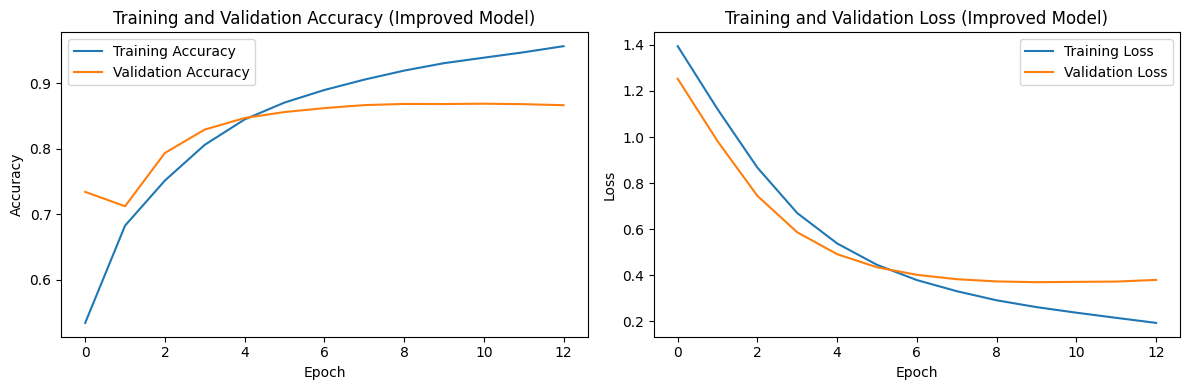

In [38]:
# Отрисовка графика прогресса обучения для улучшенной модели
plt.figure(figsize=(12, 4))

# Отрисовка аккуратности (точности) модели
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Improved Model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Отрисовка значений функции потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Improved Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


**СРАВНИМ РЕЗУЛЬТАТЫ**

In [39]:
print(f"First Model Test Accuracy: {test_acc:.4f}")
print(f"Improved Model Test Accuracy: {improved_test_acc:.4f}")

First Model Test Accuracy: 0.8817
Improved Model Test Accuracy: 0.8665


Вывод: даже после обучения на 13 эпохах и перебором параметров не получилось превзойти изначальные результаты, поэтому сохраняю первую модель.

In [41]:
model.save('first_model.keras')

# Загрузка первой модели
loaded_model = tf.keras.models.load_model('first_model.keras')

# Проверка загруженной модели
loaded_test_loss, loaded_test_acc = loaded_model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy (Loaded First Model): {loaded_test_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 9 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


307/307 - 8s - 26ms/step - accuracy: 0.8817 - loss: 0.5939
Test accuracy (Loaded First Model): 0.8817
